In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import math


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col='Id')
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
train_df.dropna(axis=0, subset=['SalePrice'], inplace=True)

y =train_df.SalePrice

corr_matrix = train_df.corr()

cor=corr_matrix["SalePrice"].sort_values(ascending=False)
cor




SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [3]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', y

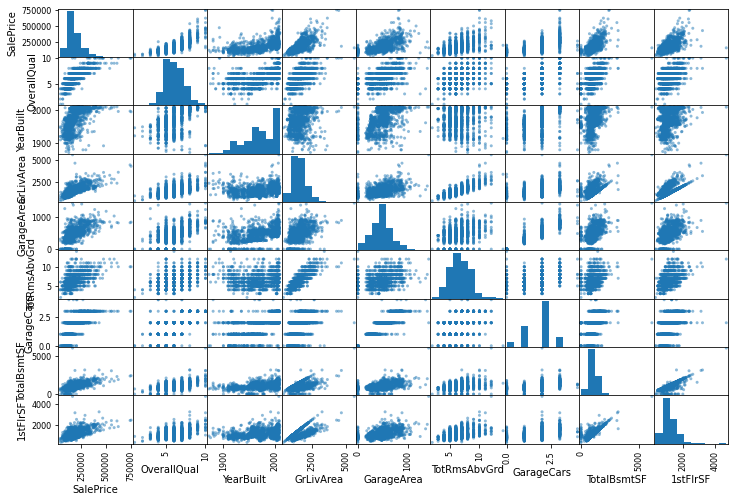

In [4]:
from pandas.plotting import scatter_matrix
attributes = ['SalePrice','OverallQual','YearBuilt','GrLivArea', 'GarageArea','TotRmsAbvGrd','GarageCars','TotalBsmtSF',
             '1stFlrSF']
scatter_matrix(train_df[attributes], figsize=(12, 8))

In [5]:
train_df.drop(['SalePrice'], axis=1, inplace=True)

In [6]:
# features_drop
features_drop= train_df[['Alley','MiscFeature','PoolQC','Fence', 'MSSubClass']]

train_df.drop(features_drop,axis=1,inplace=True)
train_df


,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [7]:
train_df= pd.get_dummies(train_df)
train_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1457,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1458,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0


In [8]:

numerical_cols = [cname for cname in train_df.columns if 
                train_df[cname].dtype in ['int64', 'float64']]
numerical_ones=train_df[numerical_cols].copy()


In [9]:
null_cols = [i for i in train_df.columns if train_df[i].isnull().sum()>=1]
null_cols


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [10]:

new_traind_df = train_df.copy()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(method="ffill")
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(method="ffill")
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(method="ffill")


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 274 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(32), uint8(239)
memory usage: 751.4 KB


In [12]:
x_train, x_test, y_train,y_test= train_test_split(train_df, y, test_size=0.3, random_state=420)
x_train.shape, y_train.shape, x_test.shape ,y_test.shape


((1022, 274), (1022,), (438, 274), (438,))

In [13]:
RF =RandomForestRegressor(n_estimators=300,random_state=420,max_depth=20)
reg=RF.fit(x_train,y_train)

print(RF.score(x_train,y_train))

y_pred1=RF.predict(x_test)

print(RF.score(x_test,y_pred1))
print('MSE:', mean_squared_error(np.log(y_test), np.log(y_pred1),squared=False))
print('RMSE:', math.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred1),squared=False)))

0.9808202016553694
1.0
MSE: 0.1517669557317787
RMSE: 0.38957278617965435


In [14]:
Reg = DecisionTreeRegressor(random_state = 1)
Reg.fit(x_train, y_train)
print(Reg.score(x_train,y_train))
y_pred2= Reg.predict(x_test)
print(Reg.score(x_test,y_pred2))
print('MSE:', mean_squared_error(np.log(y_test), np.log(y_pred2),squared=False))
print('RMSE:', math.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred2),squared=False)))

1.0
1.0
MSE: 0.20565610764215367
RMSE: 0.4534932277798133


In [15]:
from xgboost import XGBRegressor

XGB=XGBRegressor(learning_rate=0.1,n_estimators=400)
XGB.fit(x_train,y_train)

y_pred3 = XGB.predict(x_test)
print('MSE:', mean_squared_error(np.log(y_test), np.log(y_pred3),squared=False))

print('RMSE:', math.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred3),squared=False)))

MSE: 0.13568361153840441
RMSE: 0.3683525641805747


In [16]:
from sklearn.svm import LinearSVR
#train the model
model  = LinearSVR(epsilon = 1)
model = model.fit(x_train, y_train)
y_pred4= model.predict(x_test)
print(model.score(x_test,y_pred4))
print('MSE:', mean_squared_error(np.log(y_test), np.log(y_pred4),squared=False))
print('RMSE:', math.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred4),squared=False)))

1.0
MSE: 0.22008362774944254
RMSE: 0.46913071499257275


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
